In [5]:
#import the needed librairies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()

In [6]:
#Now let's get and put the data in  pandas dataframe

order_products_all = pd.read_csv('order_products.csv')
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')
aisles = pd.read_csv('aisles.csv')
departments = pd.read_csv('departments.csv')

In [4]:
#display first five rows.

order_products_all.head(5)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [5]:
# Check the number of unique orders and unique products
orders_Unique = len(order_products_all.order_id.unique())
products_Unique = len(order_products_all.product_id.unique())
print("There are %s orders for %s products" %(orders_Unique, products_Unique))

There are 3346083 orders for 49685 products


### Number of products that people usually order

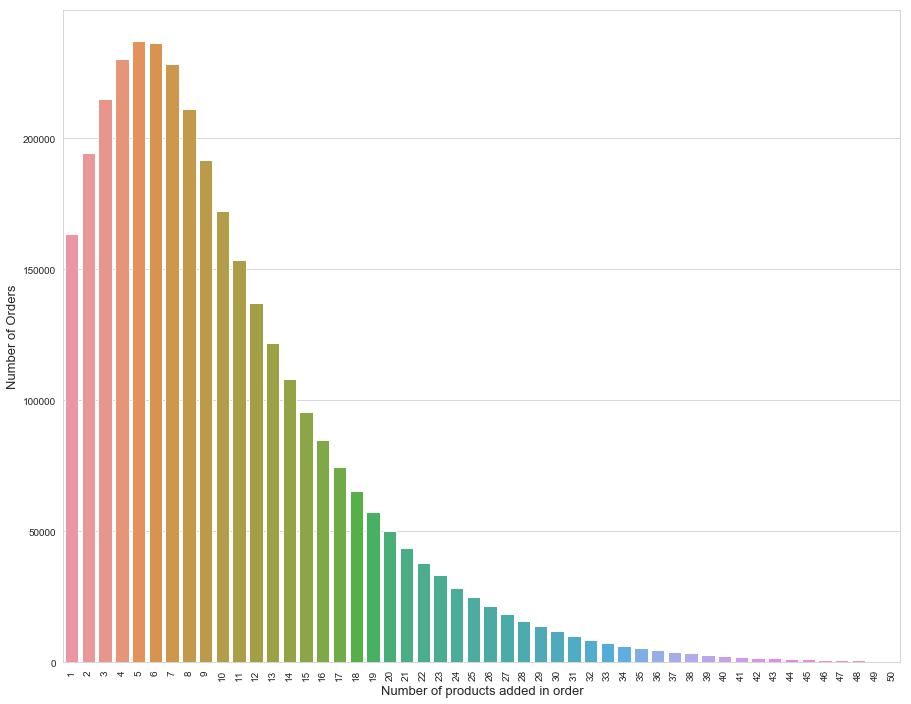

In [6]:
grouped = order_products_all.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
grouped = grouped.add_to_cart_order.value_counts().head(50)

sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='vertical')
sns.barplot(grouped.index, grouped.values)

plt.ylabel('Number of Orders', fontsize=13)
plt.xlabel('Number of products added in order', fontsize=13)
plt.show()

### Now let's identify which products are ordered the most.

In [7]:
grouped = order_products_all.groupby("product_id")["reordered"].aggregate({'Total_reorders': 'count'}).reset_index()
grouped = pd.merge(grouped, products[['product_id', 'product_name']], how='left', on='product_id')
grouped = grouped.merge(products[['product_id', 'product_name']], how='left', on='product_id')
grouped = grouped.sort_values(by='Total_reorders', ascending=False)[:10]
grouped

C:\Users\Guang\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,product_id,Total_reorders,product_name
24849,24852,491291,Banana
13173,13176,394930,Bag of Organic Bananas
21134,21137,275577,Organic Strawberries
21900,21903,251705,Organic Baby Spinach
47205,47209,220877,Organic Hass Avocado
47762,47766,184224,Organic Avocado
47622,47626,160792,Large Lemon
16794,16797,149445,Strawberries
26206,26209,146660,Limes
27842,27845,142813,Organic Whole Milk


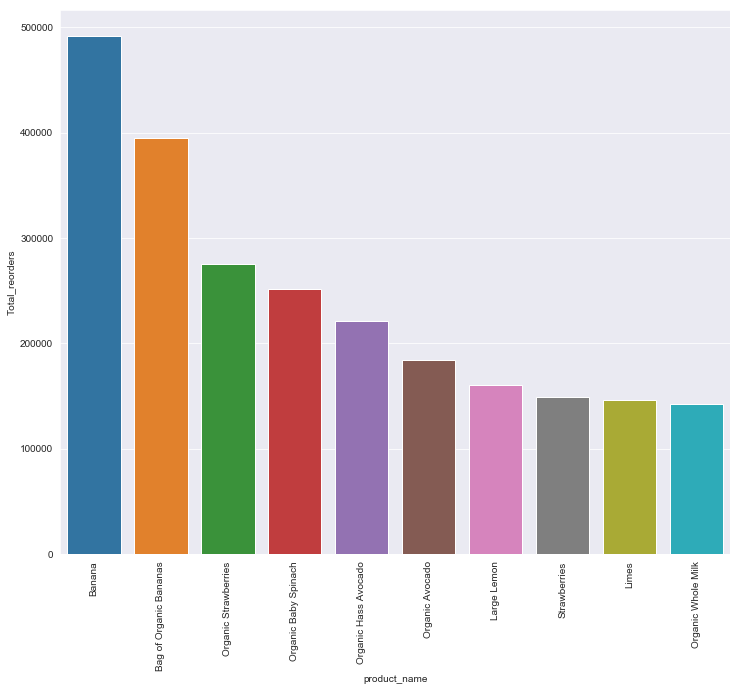

In [8]:
# Fruits like banana , strawberries...are the most ordered products.
sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(12, 10))
plt.xticks(rotation='vertical')
sns.barplot(grouped.product_name, grouped.Total_reorders)

Which products are usually reordered ?

In [9]:
grouped = order_products_all.groupby("product_id")["reordered"].aggregate({'reorder_sum': sum,'reorder_total': 'count'}).reset_index()
grouped['reorder_probability'] = grouped['reorder_sum'] / grouped['reorder_total']
# join product to get product name
grouped = pd.merge(grouped, products[['product_id', 'product_name']], how='left', on='product_id')
grouped = grouped[grouped.reorder_total > 50].sort_values(['reorder_probability'], ascending=False)[:10]
grouped

C:\Users\Guang\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,product_id,reorder_sum,reorder_total,reorder_probability,product_name
6431,6433,65,69,0.942029,Raw Veggie Wrappers
2074,2075,84,90,0.933333,Serenity Ultimate Extrema Overnight Pads
27737,27740,94,102,0.921569,Chocolate Love Bar
36540,36543,62,69,0.898551,Bars Peanut Butter
26090,26093,60,67,0.895522,Soy Crisps Lightly Salted
35601,35604,93,104,0.894231,Maca Buttercups
38248,38251,99,111,0.891892,Benchbreak Chardonnay
36798,36801,88,99,0.888889,Organic Blueberry B Mega
31415,31418,55,62,0.887097,Sparking Water
10233,10236,114,131,0.870229,Fragrance Free Clay with Natural Odor Eliminat...


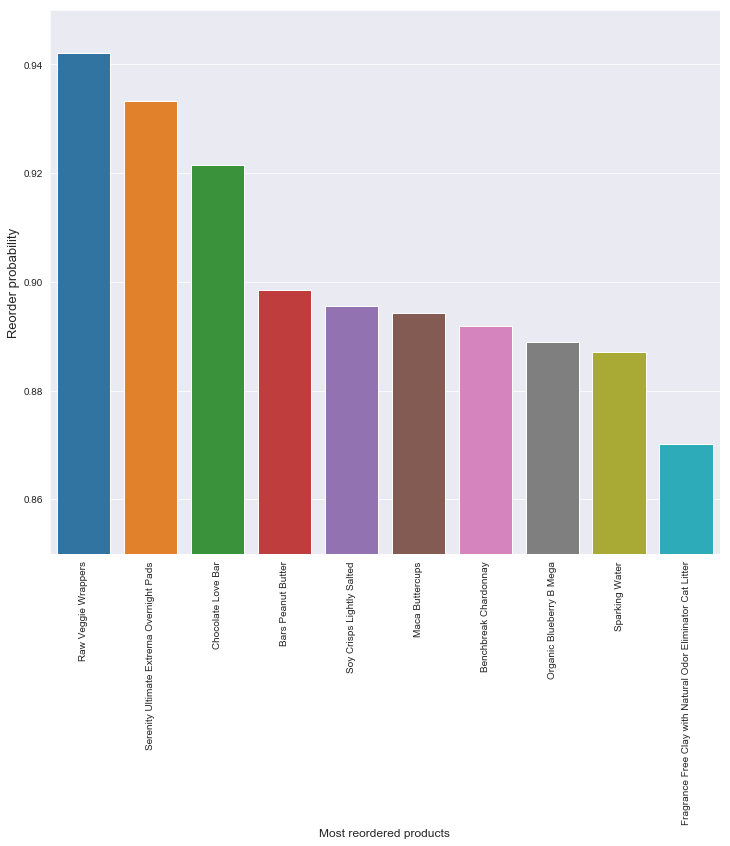

In [10]:
sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(12, 10))
plt.xticks(rotation='vertical')
sns.barplot(grouped.product_name, grouped.reorder_probability)
plt.ylim([0.85,0.95])
plt.ylabel('Reorder probability', fontsize=13)
plt.xlabel('Most reordered products', fontsize=12)
plt.show()

### Which product is most likely to be added first in cart?

In [18]:
order_products_all_name = pd.merge(order_products_all, products, how="left",on="product_id")
productsCountFirst = order_products_all_name[order_products_all_name["add_to_cart_order"]==1]["product_name"].value_counts()

In [19]:
productsCountFirst.head(10)

Banana                    115521
Bag of Organic Bananas     82877
Organic Whole Milk         32071
Organic Strawberries       28875
Organic Hass Avocado       24913
Organic Baby Spinach       24412
Organic Avocado            23393
Spring Water               17552
Strawberries               17073
Organic Raspberries        14950
Name: product_name, dtype: int64

### Let's explore now the orders.csv file

In [20]:
#display first five rows of our dataset.

orders.head(5)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [21]:
orders.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.214874e+06
mean,1.710542e+06,1.029782e+05,1.715486e+01,2.776219e+00,1.345202e+01,1.111484e+01
std,9.875817e+05,5.953372e+04,1.773316e+01,2.046829e+00,4.226088e+00,9.206737e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.552715e+05,5.139400e+04,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00
50%,1.710542e+06,1.026890e+05,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00
75%,2.565812e+06,1.543850e+05,2.300000e+01,5.000000e+00,1.600000e+01,1.500000e+01
max,3.421083e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01


### What is the time at which people usually order products

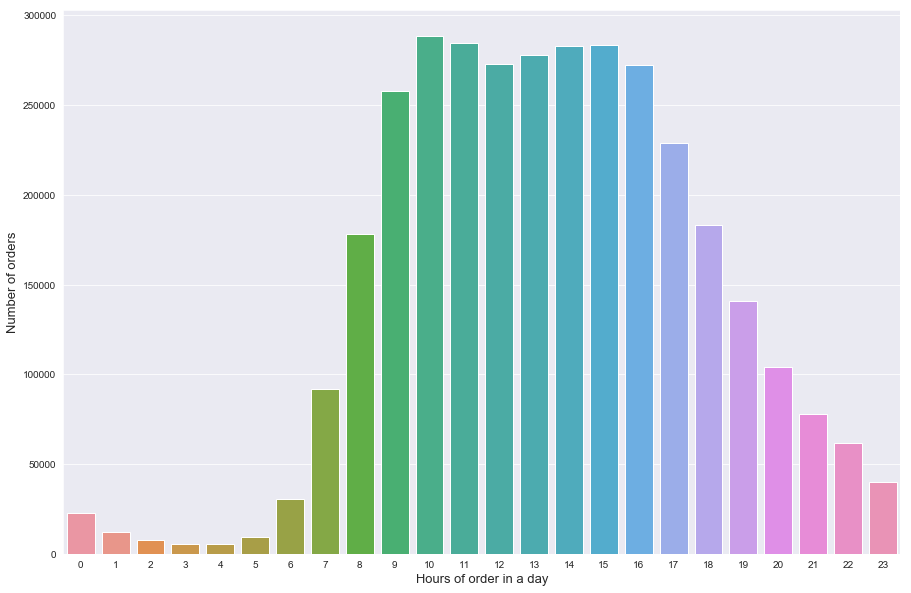

In [39]:
# Time at which people usually order products.

grouped = orders.order_hour_of_day.value_counts()

# alternatively using groupby
# grouped = orders.groupby("order_hour_of_day")["order_id"].aggregate(["count"]).reset_index()

sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(15, 10))
sns.barplot(grouped.index, grouped.values)
plt.ylabel('Number of orders', fontsize=13)
plt.xlabel('Hours of order in a day', fontsize=13)
plt.show()

So majority of the orders are made during day time. Now let us combine the day of week and hour of day to see the distribution.

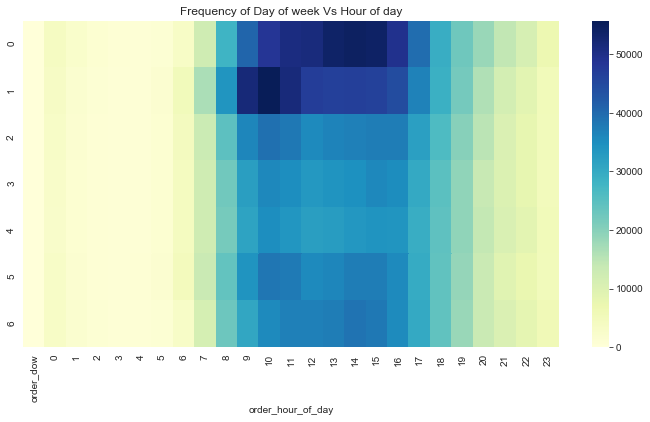

In [49]:
grouped = orders.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate(["count"]).reset_index()
grouped = grouped.pivot_table('count', 'order_dow', 'order_hour_of_day').reset_index()

plt.figure(figsize=(12,6))
sns.heatmap(grouped, cmap="YlGnBu")
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()

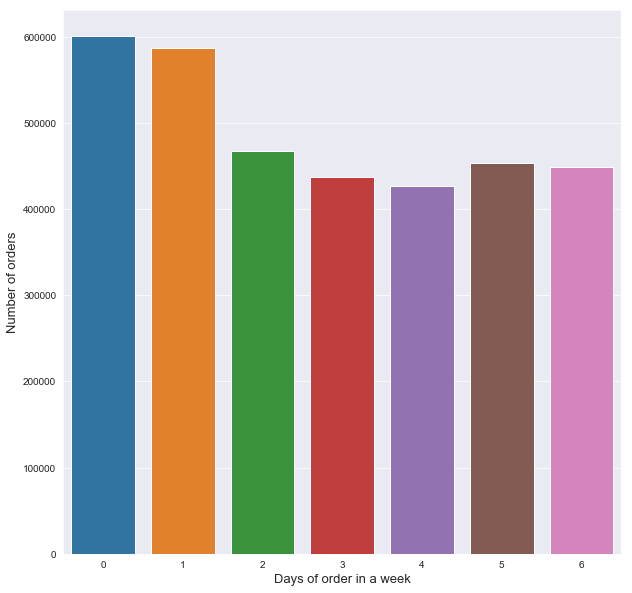

In [50]:
# Days of Orders in a week:

#grouped = orders.groupby("order_id")["order_dow"].aggregate("sum").reset_index()
grouped = orders.order_dow.value_counts()

f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(grouped.index, grouped.values)
plt.ylabel('Number of orders', fontsize=13)
plt.xlabel('Days of order in a week', fontsize=13)
plt.show()

Seems Satuday evenings and Sunday mornings are the prime time for orders.

Now let us check the time interval between the orders.

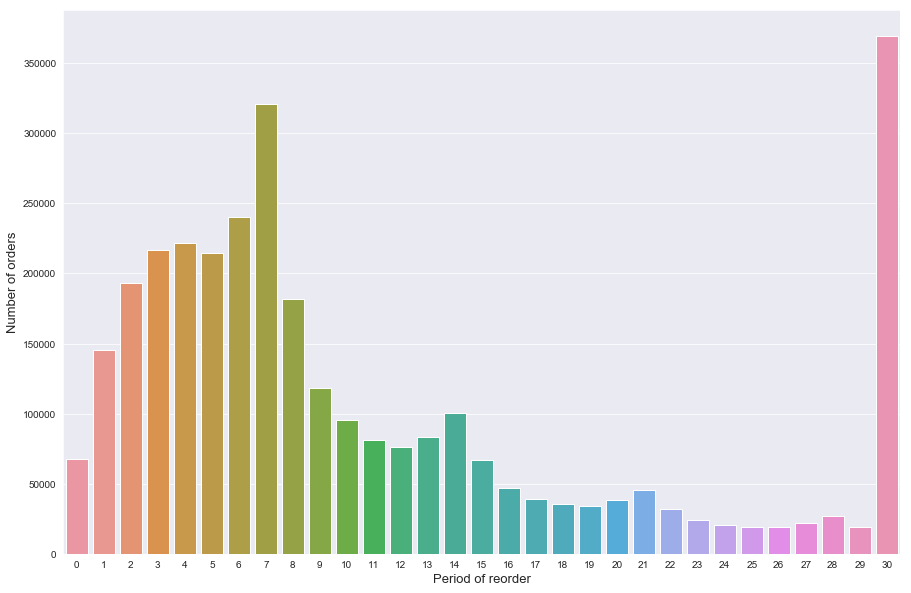

In [54]:
# Period of Reorders:

#grouped = orders.groupby("order_id")["days_since_prior_order"].aggregate("sum").reset_index()
grouped = orders.days_since_prior_order.value_counts()

from matplotlib.ticker import FormatStrFormatter
f, ax = plt.subplots(figsize=(15, 10))
sns.barplot(grouped.index, grouped.values)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.ylabel('Number of orders', fontsize=13)
plt.xlabel('Period of reorder', fontsize=13)
plt.show()

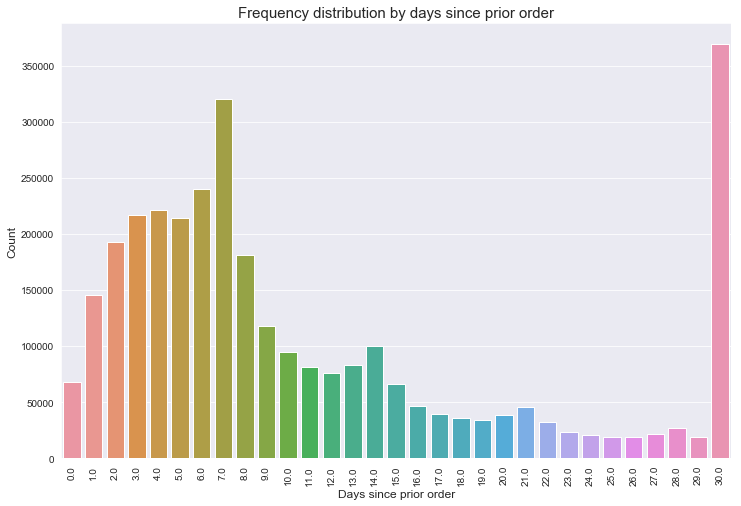

In [52]:
# you can use count plot to achieve the same thing
plt.figure(figsize=(12,8))
sns.countplot(x="days_since_prior_order", data=orders)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Days since prior order', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency distribution by days since prior order", fontsize=15)
plt.show()

Let's check the number of orders made by each costumer in the whole dataset.

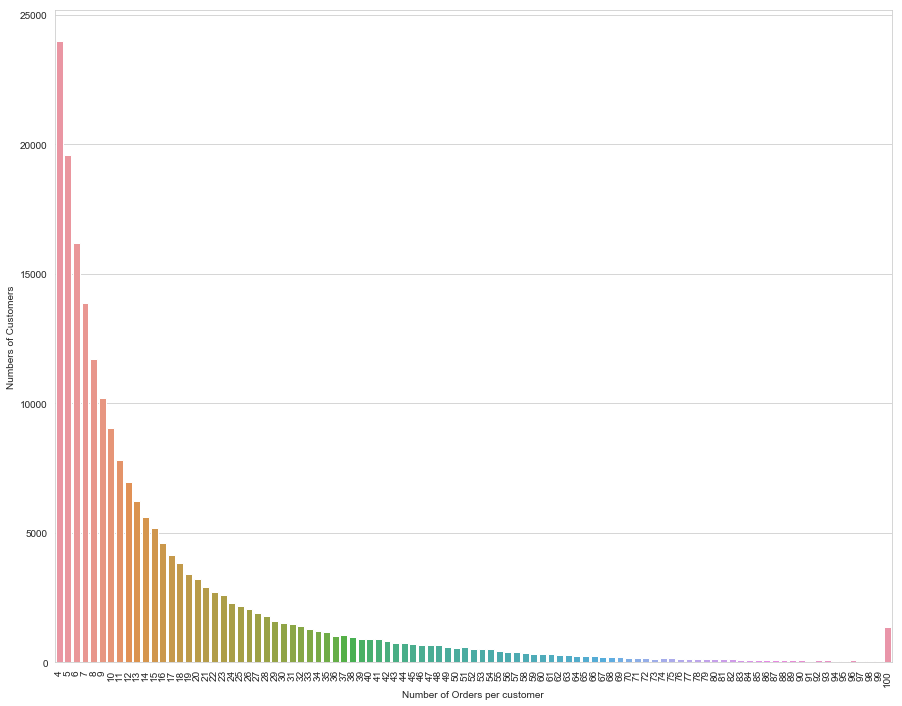

In [55]:
grouped = orders.groupby('user_id')['order_id'].apply(lambda x: len(x.unique())).reset_index()
grouped = grouped.groupby('order_id').aggregate(["count"])

sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(15, 12))
sns.barplot(grouped.index, grouped.user_id)
plt.ylabel('Numbers of Customers')
plt.xlabel('Number of Orders per customer')
plt.xticks(rotation='vertical')
plt.show()

### What are customers' favorite Departments and Aisles ?

In [17]:
# first let's combine products and departments into one dataframe
items  = pd.merge(left = pd.merge(left=products, right=departments, how='left'), right=aisles, how='left')
items.head()

,product_id,product_name,aisle_id,department_id,department,aisle
0,1,Chocolate Sandwich Cookies,61,19,snacks,cookies cakes
1,2,All-Seasons Salt,104,13,pantry,spices seasonings
2,3,Robust Golden Unsweetened Oolong Tea,94,7,beverages,tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen,frozen meals
4,5,Green Chile Anytime Sauce,5,13,pantry,marinades meat preparation


In [18]:
users_flow = orders[['user_id', 'order_id']].merge(order_products_all[['order_id', 'product_id']],
                                          how='inner', left_on='order_id', right_on='order_id')

users_flow = users_flow.merge(items, how='inner', left_on='product_id',
                                         right_on='product_id')

Best Selling Departments (number of Orders)

In [19]:
grouped = users_flow.groupby("department")["order_id"].aggregate({'Total_orders': 'count'}).reset_index()
grouped['Ratio'] = grouped["Total_orders"].apply(lambda x: x /grouped['Total_orders'].sum())
grouped.sort_values(by='Total_orders', ascending=False, inplace=True)
grouped

C:\Users\Guang\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,department,Total_orders,Ratio
19,produce,9888378,0.292390
7,dairy eggs,5631067,0.166505
20,snacks,3006412,0.088897
3,beverages,2804175,0.082917
10,frozen,2336858,0.069099
16,pantry,1956819,0.057861
2,bakery,1225181,0.036227
6,canned goods,1114857,0.032965
8,deli,1095540,0.032394
9,dry goods pasta,905340,0.026770


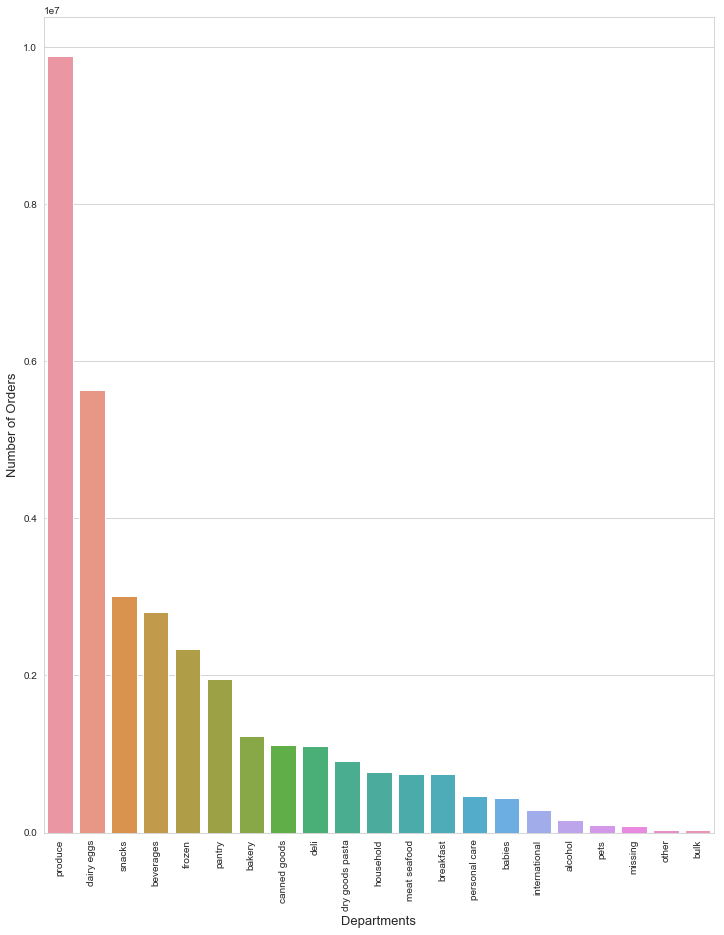

In [20]:
f, ax = plt.subplots(figsize=(12, 15))
plt.xticks(rotation='vertical')
sns.barplot(grouped.department, grouped.Total_orders)
plt.ylabel('Number of Orders', fontsize=13)
plt.xlabel('Departments', fontsize=13)
plt.show()


Let us now check the department wise distribution in pie chart

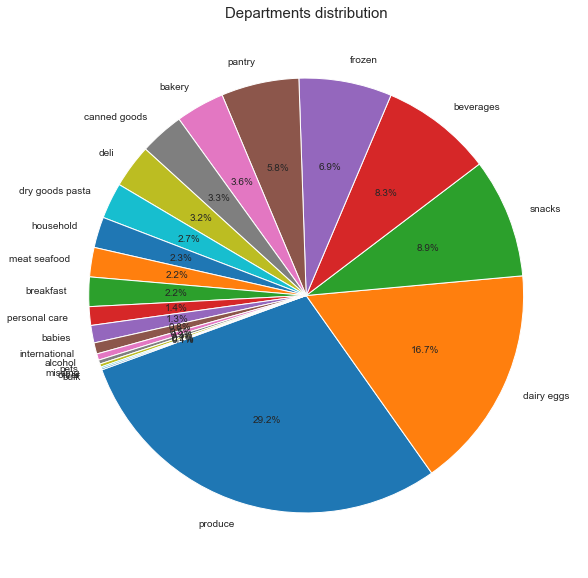

In [56]:
plt.figure(figsize=(10,10))
temp_series = users_flow['department'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=200)
plt.title("Departments distribution", fontsize=15)
plt.show()

### Best Selling Aisles in each Department (number of Orders)

In [43]:
grouped = users_flow.groupby(["department", "aisle"])["order_id"].aggregate({'Total_orders': 'count'}).reset_index()
grouped.sort_values(by='Total_orders', ascending=False, inplace=True)

C:\Users\Guang\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


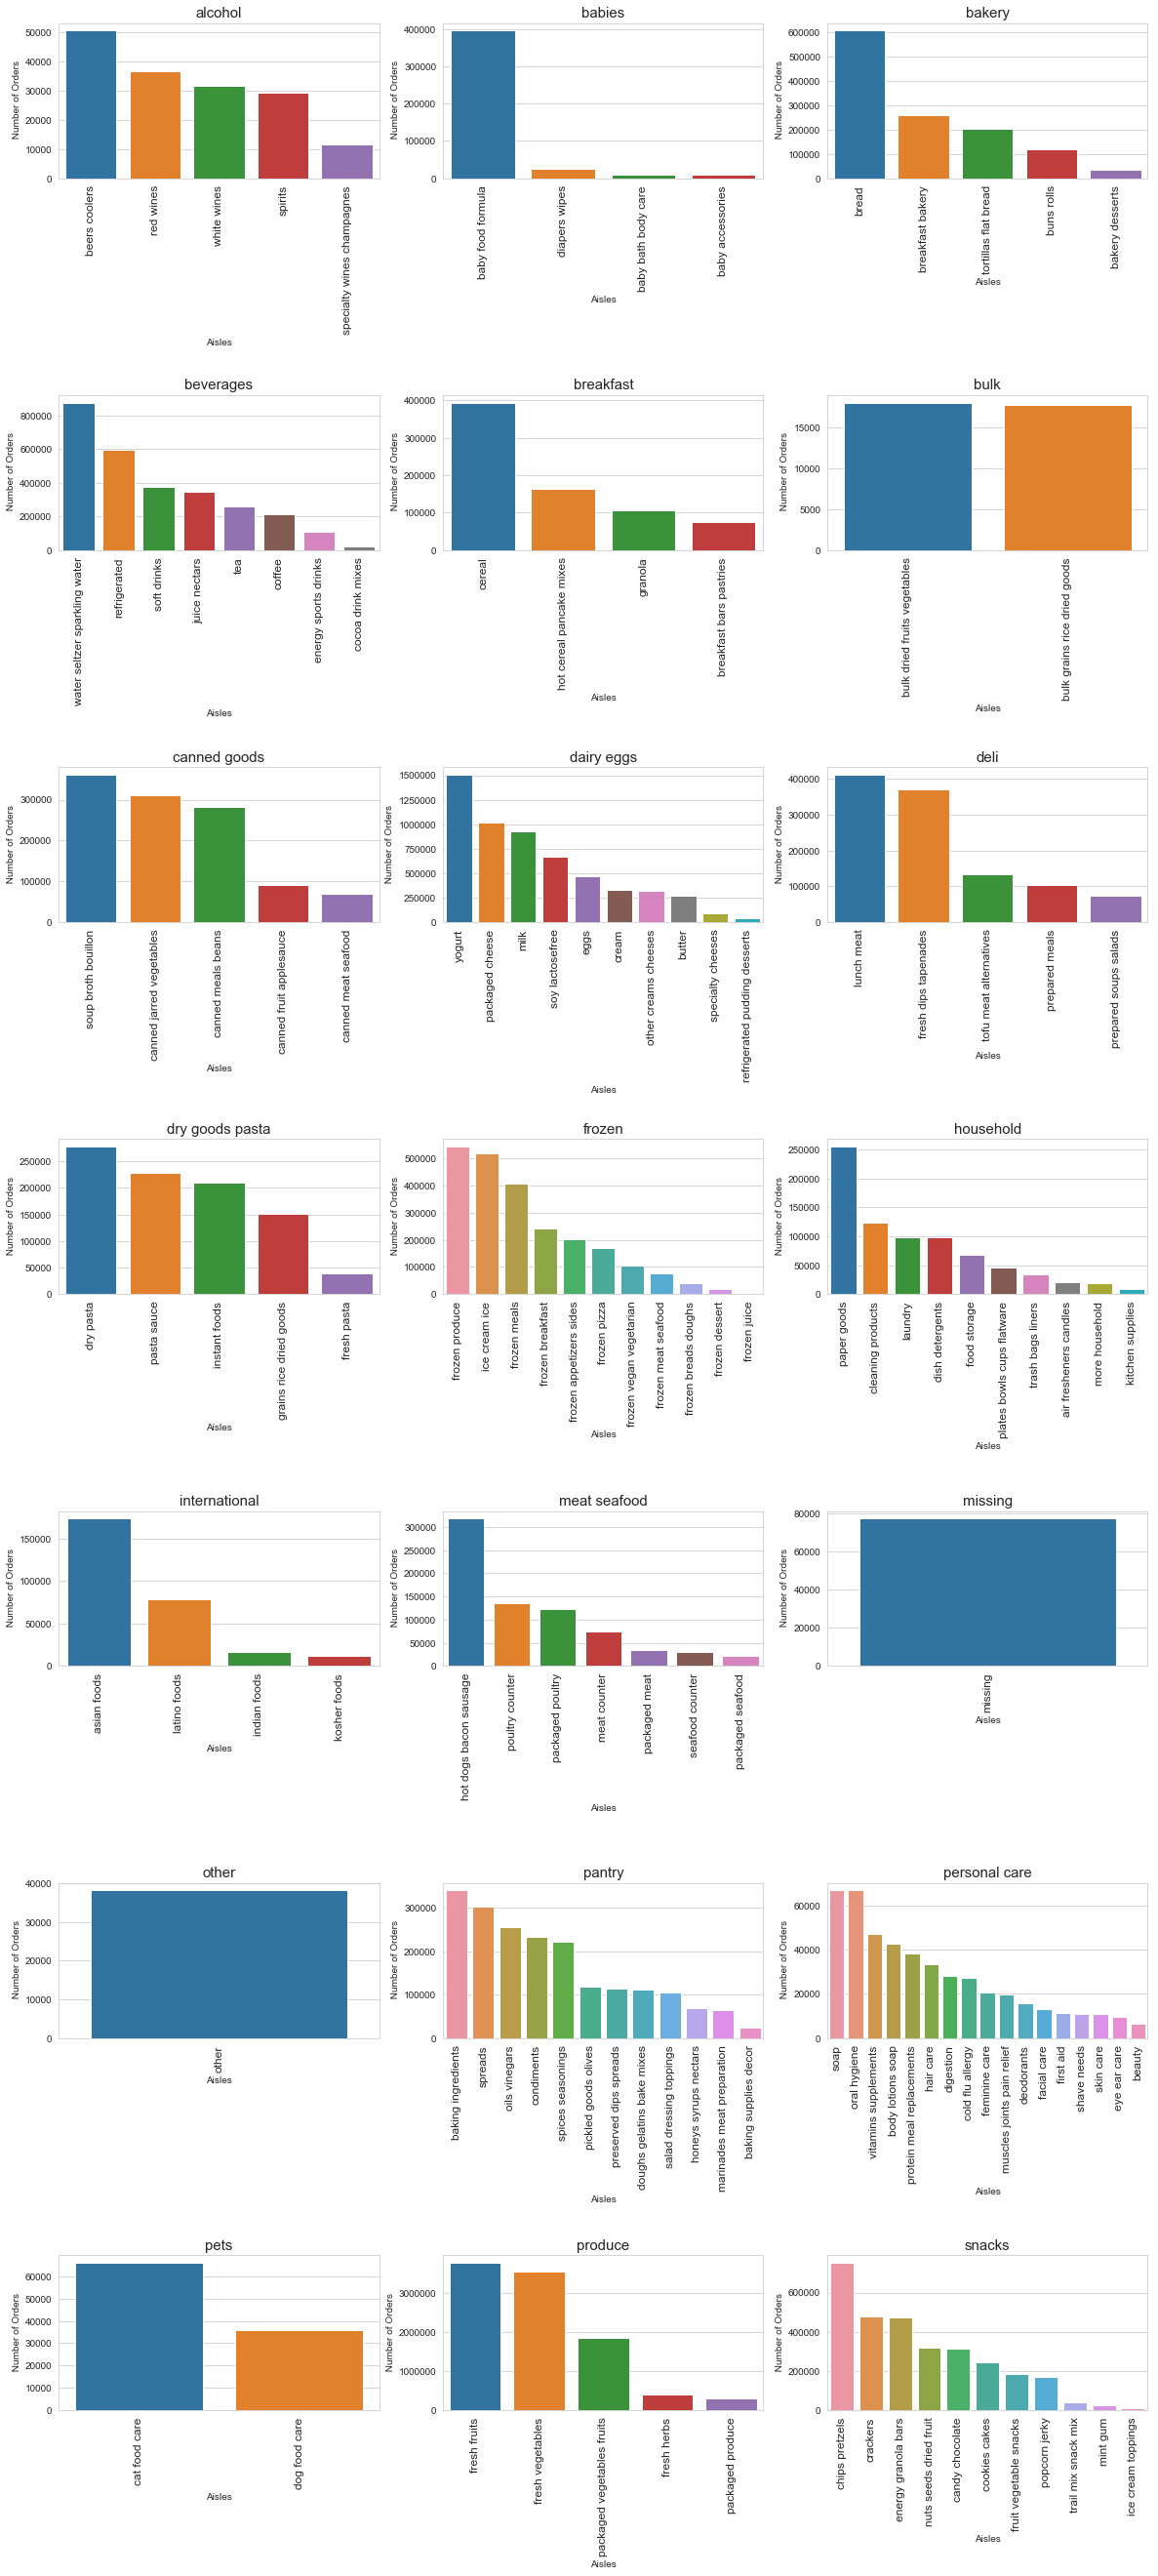

In [44]:
fig, axes = plt.subplots(7,3, figsize=(20,45), gridspec_kw =  dict(hspace=1.4))
for (aisle, group), ax in zip(grouped.groupby(["department"]), axes.flatten()):
    g = sns.barplot(group.aisle, group.Total_orders , ax=ax)
    ax.set(xlabel = "Aisles", ylabel=" Number of Orders")
    g.set_xticklabels(labels = group.aisle,rotation=90, fontsize=12)
    ax.set_title(aisle, fontsize=15)

### Best Selling Aisles over all Departments.

In [45]:
grouped = users_flow.groupby("aisle")["order_id"].aggregate({'Total_orders': 'count'}).reset_index()
grouped['Ratio'] = grouped["Total_orders"].apply(lambda x: x /grouped['Total_orders'].sum())
grouped.sort_values(by='Total_orders', ascending=False, inplace=True)
grouped.head(10)

C:\Users\Guang\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,aisle,Total_orders,Ratio
50,fresh fruits,3792661,0.112146
53,fresh vegetables,3568630,0.105521
98,packaged vegetables fruits,1843806,0.054520
133,yogurt,1507583,0.044578
93,packaged cheese,1021462,0.030204
83,milk,923659,0.027312
131,water seltzer sparkling water,878150,0.025966
25,chips pretzels,753739,0.022287
119,soy lactosefree,664493,0.019648
11,bread,608469,0.017992


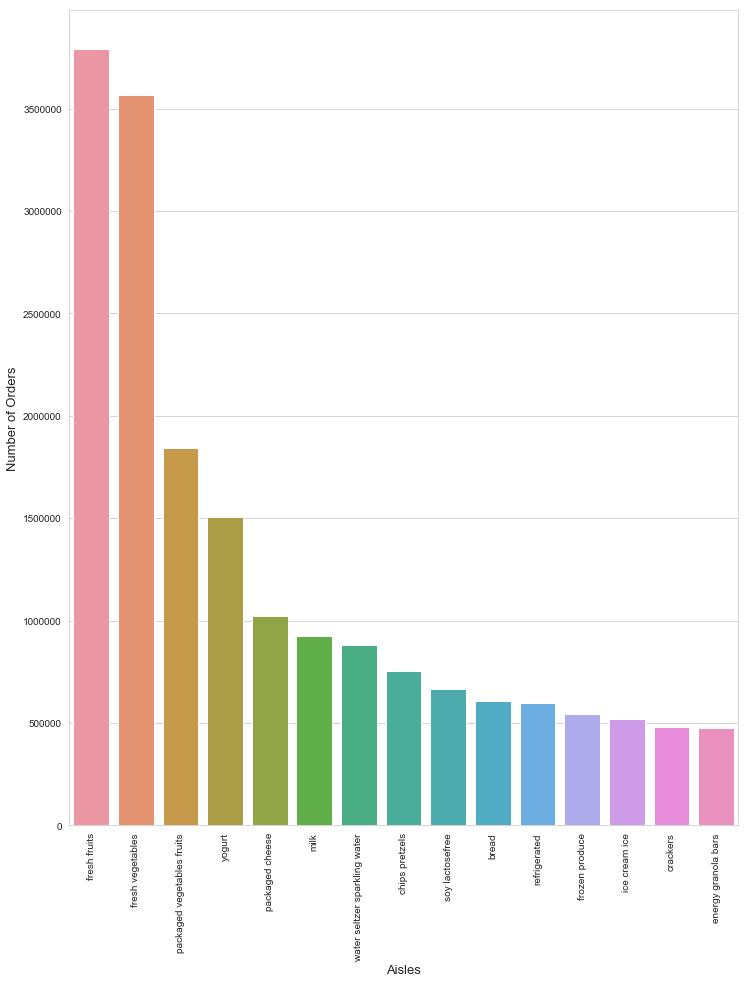

In [46]:
grouped  = grouped.groupby(['aisle']).sum()['Total_orders'].sort_values(ascending=False)[:15]

f, ax = plt.subplots(figsize=(12, 15))
plt.xticks(rotation='vertical')
sns.barplot(grouped.index, grouped.values)
plt.ylabel('Number of Orders', fontsize=13)
plt.xlabel('Aisles', fontsize=13)
plt.show()